In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd

with open('stats_stylegan.jsonl', 'r') as f:
    data = [json.loads(line) for line in f]

kimg = []
G_loss_mean = []
G_loss_std = []
D_loss_mean = []
D_loss_std = []
r1_penalty_mean = []
r1_penalty_std = []
scores_fake_mean = []
scores_fake_std = []
scores_real_mean = []
scores_real_std = []

for idx, entry in enumerate(data):
    kimg.append(idx * 10)
    
    G_loss = entry['Loss/G/loss']
    G_loss_mean.append(G_loss['mean'])
    G_loss_std.append(G_loss['std'])
    
    D_loss = entry['Loss/D/loss']
    D_loss_mean.append(D_loss['mean'])
    D_loss_std.append(D_loss['std'])
    
    r1 = entry['Loss/r1_penalty']
    r1_penalty_mean.append(r1['mean'])
    r1_penalty_std.append(r1['std'])
    
    fake = entry['Loss/scores/fake']
    scores_fake_mean.append(fake['mean'])
    scores_fake_std.append(fake['std'])
    
    real = entry['Loss/scores/real']
    scores_real_mean.append(real['mean'])
    scores_real_std.append(real['std'])

df = pd.DataFrame({
    'kimg': kimg,
    'G_loss_mean': G_loss_mean,
    'G_loss_std': G_loss_std,
    'D_loss_mean': D_loss_mean,
    'D_loss_std': D_loss_std,
    'r1_penalty_mean': r1_penalty_mean,
    'r1_penalty_std': r1_penalty_std,
    'scores_fake_mean': scores_fake_mean,
    'scores_fake_std': scores_fake_std,
    'scores_real_mean': scores_real_mean,
    'scores_real_std': scores_real_std
})

df.head()


,kimg,G_loss_mean,G_loss_std,D_loss_mean,D_loss_std,r1_penalty_mean,r1_penalty_std,scores_fake_mean,scores_fake_std,scores_real_mean,scores_real_std
0,0,0.720340,0.028218,1.456100,0.093703,0.002837,0.001527,-0.035389,0.065802,0.762570,1.177361
1,10,1.492489,0.688896,1.002842,0.683246,0.060677,0.114566,-0.926230,0.879927,1.791851,3.372152
2,20,1.734000,1.454896,1.161542,0.638754,0.017101,0.019571,-0.973209,1.340918,0.523037,1.362041
3,30,1.704342,1.357753,1.017822,0.607118,0.023597,0.027871,-1.037702,1.290353,0.799903,1.371170
4,40,1.472169,0.891130,1.098664,0.501481,0.033136,0.036084,-0.810089,0.989762,0.594044,1.124964


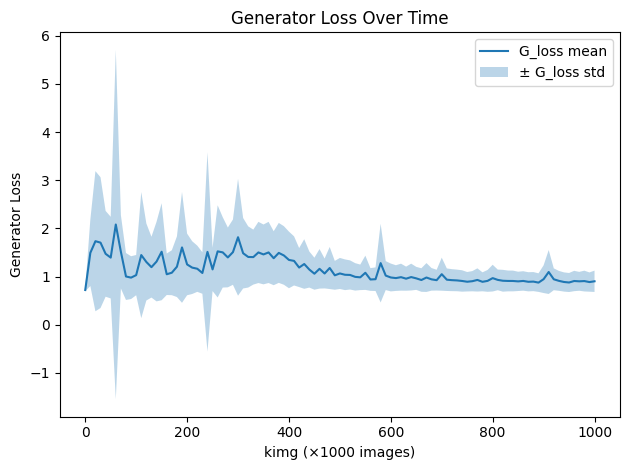

In [6]:
kimg = df['kimg'].to_numpy(dtype=float)
g_mean = df['G_loss_mean'].to_numpy(dtype=float)
g_std = df['G_loss_std'].to_numpy(dtype=float)

# Plot G_loss_mean with std shading
plt.figure()
plt.plot(kimg, g_mean, label='G_loss mean')
plt.fill_between(
    kimg,
    g_mean - g_std,
    g_mean + g_std,
    alpha=0.3,
    label='± G_loss std'
)
plt.xlabel('kimg (×1000 images)')
plt.ylabel('Generator Loss')
plt.title('Generator Loss Over Time')
plt.legend()
plt.tight_layout()
plt.show()

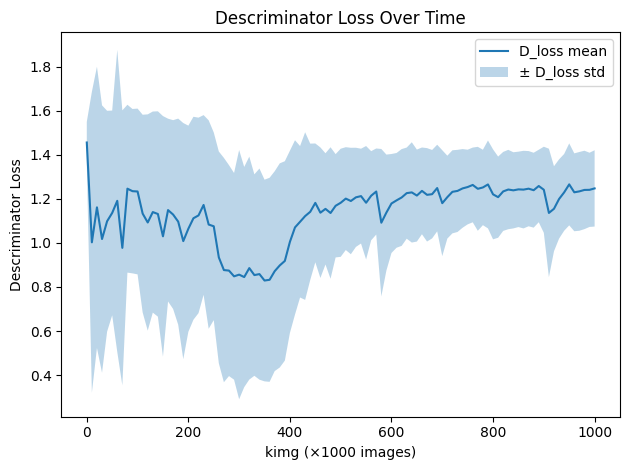

In [8]:
kimg = df['kimg'].to_numpy(dtype=float)
d_mean = df['D_loss_mean'].to_numpy(dtype=float)
d_std = df['D_loss_std'].to_numpy(dtype=float)

# Plot D_loss_mean with std shading
plt.figure()
plt.plot(kimg, d_mean, label='D_loss mean')
plt.fill_between(
    kimg,
    d_mean - d_std,
    d_mean + d_std,
    alpha=0.3,
    label='± D_loss std'
)
plt.xlabel('kimg (×1000 images)')
plt.ylabel('Descriminator Loss')
plt.title('Descriminator Loss Over Time')
plt.legend()
plt.tight_layout()
plt.show()

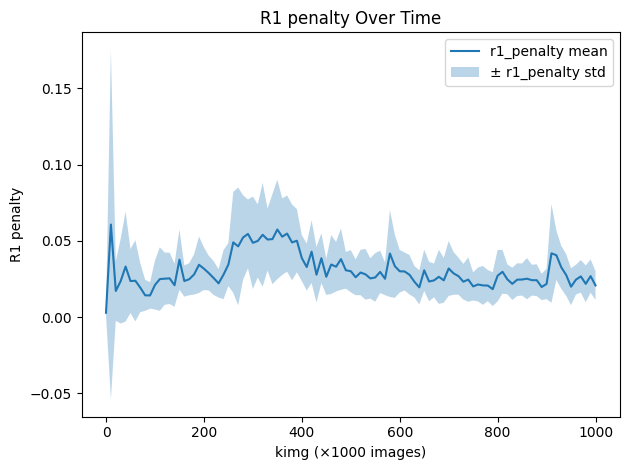

In [9]:
kimg = df['kimg'].to_numpy(dtype=float)
r1_mean = df['r1_penalty_mean'].to_numpy(dtype=float)
r1_std = df['r1_penalty_std'].to_numpy(dtype=float)

# Plot r1_penalty_mean with std shading
plt.figure()
plt.plot(kimg, r1_mean, label='r1_penalty mean')
plt.fill_between(
    kimg,
    r1_mean - r1_std,
    r1_mean + r1_std,
    alpha=0.3,
    label='± r1_penalty std'
)
plt.xlabel('kimg (×1000 images)')
plt.ylabel('R1 penalty')
plt.title('R1 penalty Over Time')
plt.legend()
plt.tight_layout()
plt.show()

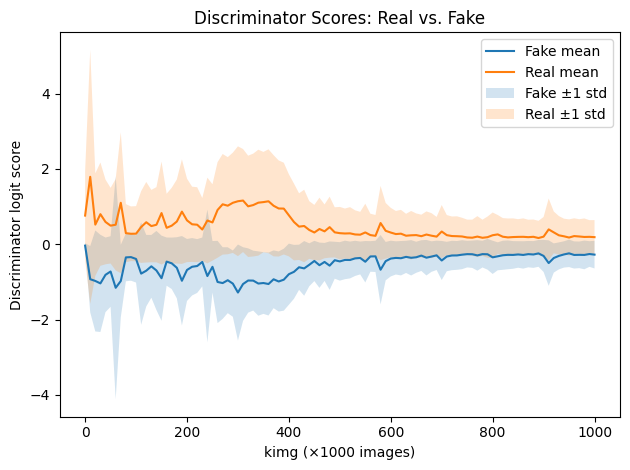

In [10]:
x = df['kimg'].to_numpy(dtype=float)
fake_mean = df['scores_fake_mean'].to_numpy(dtype=float)
fake_std  = df['scores_fake_std'].to_numpy(dtype=float)
real_mean = df['scores_real_mean'].to_numpy(dtype=float)
real_std  = df['scores_real_std'].to_numpy(dtype=float)

plt.figure()
plt.plot(x, fake_mean, label='Fake mean')
plt.plot(x, real_mean, label='Real mean')
plt.fill_between(x, fake_mean - fake_std, fake_mean + fake_std,
                 alpha=0.2, label='Fake ±1 std')
plt.fill_between(x, real_mean - real_std, real_mean + real_std,
                 alpha=0.2, label='Real ±1 std')
plt.xlabel('kimg (×1000 images)')
plt.ylabel('Discriminator logit score')
plt.title('Discriminator Scores: Real vs. Fake')
plt.legend()
plt.tight_layout()
plt.show()


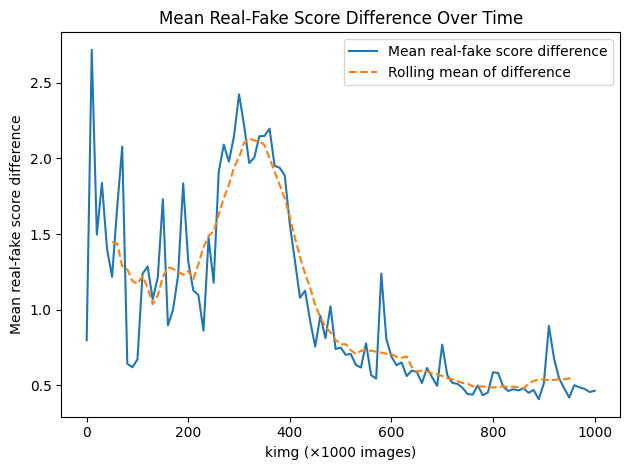

In [20]:
kimg = df['kimg'].to_numpy(dtype=float)
df['mean_diff'] = df['scores_real_mean'] - df['scores_fake_mean']
df['rolling_mean_diff'] = df['mean_diff'].rolling(window=10, center=True).mean()

plt.figure()
plt.plot(kimg, df['mean_diff'], label='Mean real-fake score difference')
plt.plot(kimg, df['rolling_mean_diff'], label='Rolling mean of difference', linestyle='--')
plt.xlabel('kimg (×1000 images)')
plt.ylabel('Mean real-fake score difference')
plt.title('Mean Real-Fake Score Difference Over Time')
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
import json
import pandas as pd

with open('metric-fid50k.jsonl', 'r') as f:
    data = [json.loads(line) for line in f]

kimg = []
fid_50k_full = []

for idx, entry in enumerate(data):
    
    kimg.append(idx * 50)
    fid = entry['results']['fid50k_full']
    fid_50k_full.append(fid)

df = pd.DataFrame({
    'kimg': kimg,
    'fid_50k_full': fid_50k_full
})

df.head()

,kimg,fid_50k_full
0,0,349.924982
1,50,251.345054
2,100,256.495686
3,150,316.527821
4,200,237.141986


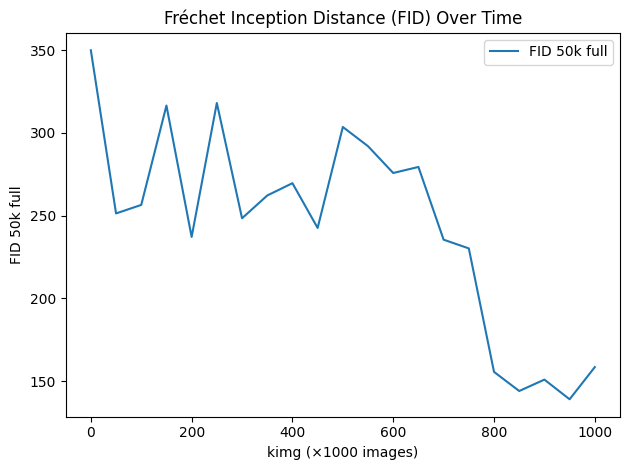

In [12]:
import matplotlib.pyplot as plt

kimg = df['kimg'].to_numpy(dtype=float)
fid_50k_full = df['fid_50k_full'].to_numpy(dtype=float)

plt.figure()
plt.plot(kimg, fid_50k_full, label='FID 50k full')

plt.xlabel('kimg (×1000 images)')
plt.ylabel('FID 50k full')
plt.title('Fréchet Inception Distance (FID) Over Time')
plt.legend()
plt.tight_layout()
plt.show()